In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

## *Load data*

In [2]:
mask_context = [[32,96],[32,96]] # The size and position of the context
mask_gap = [[16,48],[16,48]]     # The size and position (relative to the context) of the gap

In [3]:
gap_dev_pred, discrim_fake_output_dev = [], []

filename = 'G:\\ltyworkstuff\\postdoc\\Results\\TRGAN_Michele_NEI_GFD\\output\\TRGAN_Michele_NEI64_EKW1_ESW1_DKW2_DSW2_NGO32_LR0.0001_AR1.e-1_VG0_OL0\\prediction\\ckpt.151.h5'
mask_GenOut_gap = [[0,32],[0,32]] # The size and position (relative to Gen output) of the gap
with h5py.File(filename, 'r') as h5f:
    context_dev = np.array(h5f.get('context_dev'))           # context data
    gap_dev = np.array(h5f.get('gap_dev'))                   # true gap data
    # predicted gap data
    gap_dev_pred.append(
        np.array(h5f.get('gap_dev_pred'))\
            [:,mask_GenOut_gap[0][0]:mask_GenOut_gap[0][1],mask_GenOut_gap[1][0]:mask_GenOut_gap[1][1],:]
    )
    discrim_fake_output_dev.append( np.array(h5f.get('discrim_fake_output_dev')) ) # discriminator output

filename = 'G:\\ltyworkstuff\\postdoc\\Results\\TRGAN_Michele_NEI_GFD\\output\\TRGAN_Michele_NEI64_EKW1_ESW1_DKW31_DSW1_NGO34_LR0.0001_AR1.e-1_VG0_OL0\\prediction\\ckpt.99.h5'
mask_GenOut_gap = [[1,33],[1,33]] # The size and position (relative to Gen output) of the gap
with h5py.File(filename, 'r') as h5f:
    # predicted gap data
    gap_dev_pred.append(
        np.array(h5f.get('gap_dev_pred'))\
            [:,mask_GenOut_gap[0][0]:mask_GenOut_gap[0][1],mask_GenOut_gap[1][0]:mask_GenOut_gap[1][1],:]
    )
    discrim_fake_output_dev.append( np.array(h5f.get('discrim_fake_output_dev')) ) # discriminator output

filename = 'G:\\ltyworkstuff\\postdoc\\Results\\TRGAN_Michele_NEI_GFD\\output\\TRGAN_Michele_NEI64_EKW1_ESW1_DKW29_DSW1_NGO36_LR0.0001_AR1.e-1_VG0_OL0\\prediction\\ckpt.32.h5'
mask_GenOut_gap = [[2,34],[2,34]] # The size and position (relative to Gen output) of the gap
with h5py.File(filename, 'r') as h5f:
    # predicted gap data
    gap_dev_pred.append(
        np.array(h5f.get('gap_dev_pred'))\
            [:,mask_GenOut_gap[0][0]:mask_GenOut_gap[0][1],mask_GenOut_gap[1][0]:mask_GenOut_gap[1][1],:]
    )
    discrim_fake_output_dev.append( np.array(h5f.get('discrim_fake_output_dev')) ) # discriminator output

filename = 'G:\\ltyworkstuff\\postdoc\\Results\\TRGAN_Michele_NEI_GFD\\output\\TRGAN_Michele_NEI64_EKW1_ESW1_DKW25_DSW1_NGO40_LR0.0001_AR1.e-1_VG0_OL0\\prediction\\ckpt.76.h5'
mask_GenOut_gap = [[4,36],[4,36]] # The size and position (relative to Gen output) of the gap
with h5py.File(filename, 'r') as h5f:
    # predicted gap data
    gap_dev_pred.append(
        np.array(h5f.get('gap_dev_pred'))\
            [:,mask_GenOut_gap[0][0]:mask_GenOut_gap[0][1],mask_GenOut_gap[1][0]:mask_GenOut_gap[1][1],:]
    )
    discrim_fake_output_dev.append( np.array(h5f.get('discrim_fake_output_dev')) ) # discriminator output

filename = 'G:\\ltyworkstuff\\postdoc\\Results\\TRGAN_Michele_NEI_GFD\\output\\TRGAN_Michele_NEI64_EKW1_ESW1_DKW17_DSW1_NGO48_LR0.0001_AR1.e-1_VG0_OL0\\prediction\\ckpt.55.h5'
mask_GenOut_gap = [[8,40],[8,40]] # The size and position (relative to Gen output) of the gap
with h5py.File(filename, 'r') as h5f:
    # predicted gap data
    gap_dev_pred.append(
        np.array(h5f.get('gap_dev_pred'))\
            [:,mask_GenOut_gap[0][0]:mask_GenOut_gap[0][1],mask_GenOut_gap[1][0]:mask_GenOut_gap[1][1],:]
    )
    discrim_fake_output_dev.append( np.array(h5f.get('discrim_fake_output_dev')) ) # discriminator output

filename = 'G:\\ltyworkstuff\\postdoc\\Results\\TRGAN_Michele_NEI_GFD\\output\\TRGAN_Michele_NEI64_EKW1_ESW1_DKW1_DSW1_NGO64_LR0.0001_AR1.e-1_VG0_OL0\\prediction\\ckpt.89.h5'
mask_GenOut_gap = [[16,48],[16,48]] # The size and position (relative to Gen output) of the gap
with h5py.File(filename, 'r') as h5f:
    # predicted gap data
    gap_dev_pred.append(
        np.array(h5f.get('gap_dev_pred'))\
            [:,mask_GenOut_gap[0][0]:mask_GenOut_gap[0][1],mask_GenOut_gap[1][0]:mask_GenOut_gap[1][1],:]
    )
    discrim_fake_output_dev.append( np.array(h5f.get('discrim_fake_output_dev')) ) # discriminator output

## *Reconstruction errors*

In [4]:
def mean_squared_error(y_true, y_pred):
    y_true_rms = np.mean( np.square(y_true) )
    output = np.mean( np.square(y_true - y_pred), axis=(1, 2, 3) ) / y_true_rms

    return output

In [5]:
batch_size = 128
mse_mean, mse_std = [], []

for i in range(len(gap_dev_pred)):
    mse = np.mean( mean_squared_error(gap_dev, gap_dev_pred[i])[0:4992].reshape((-1, batch_size)), axis=1 )
    mse_mean.append( np.mean(mse) ), mse_std.append( np.std(mse) )

Text(0.65, 0.85, 'errorbar: $\\sigma(\\Delta u^\\prime)$')

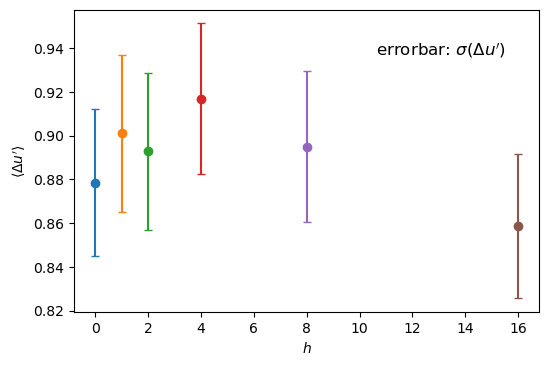

In [6]:
plt.figure(figsize=(6,4), dpi=100)
plt.xlabel('$h$')
plt.ylabel(r'$\langle\Delta u^\prime\rangle$')

h = [0, 1, 2, 4, 8, 16]
for i in range(len(gap_dev_pred)):
    plt.errorbar(h[i], mse_mean[i], yerr=mse_std[i], fmt='o', capsize=3)

plt.annotate('errorbar: $\sigma(\Delta u^\prime)$', (0.65, 0.85), xycoords='axes fraction', fontsize=12)

## *The disctiminator output*

In [7]:
batch_size = 128
dfo_mean, dfo_std = [], []

for i in range(len(gap_dev_pred)):
    dfo = np.mean( discrim_fake_output_dev[i][0:4992].reshape((-1, batch_size)), axis=1 )
    dfo_mean.append( np.mean(dfo) ), dfo_std.append( np.std(dfo) )

Text(0.4, 0.85, 'errorbar: $\\sigma(D\\{G[(1-\\hat{M})\\odot I_v]\\})$')

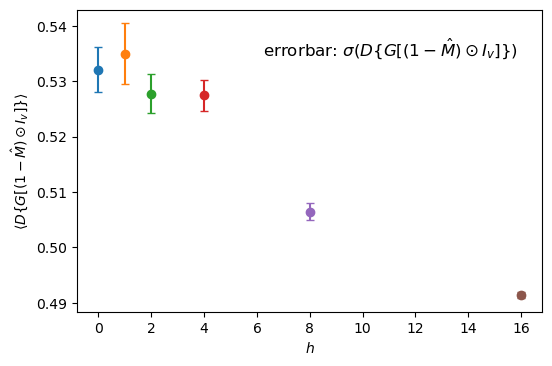

In [8]:
plt.figure(figsize=(6,4), dpi=100)
plt.xlabel('$h$')
plt.ylabel(r'$\langle D\{G[(1-\hat{M})\odot I_v]\}\rangle$')

h = [0, 1, 2, 4, 8, 16]
for i in range(len(gap_dev_pred)):
    plt.errorbar(h[i], dfo_mean[i], yerr=dfo_std[i], fmt='o', capsize=3)

plt.annotate('errorbar: $\sigma(D\{G[(1-\hat{M})\odot I_v]\})$', (0.4, 0.85), xycoords='axes fraction', fontsize=12)

## *Statistical results*
### *PDFs of velocity*

Text(0.85, 0.9, '(a)')

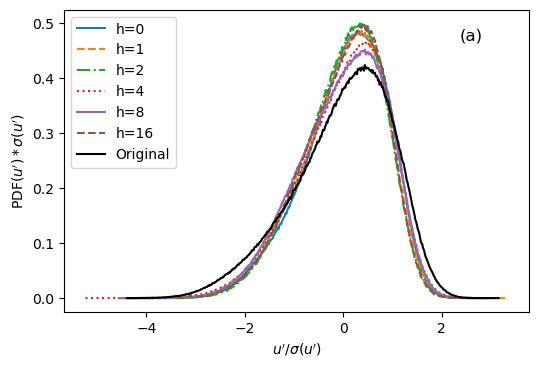

In [9]:
plt.figure(figsize=(6, 4), dpi=100)
plt.xlabel('$u^\prime/\sigma(u^\prime)$')
plt.ylabel('$\mathrm{PDF}(u^\prime)*\sigma(u^\prime)$')

fmt = ['-', '--', '-.', ':', '-', '--']
label = ['h=0', 'h=1', 'h=2', 'h=4', 'h=8', 'h=16']

gap_dev_std = np.std(gap_dev)

for i in range(len(gap_dev_pred)):
    hist, bin_edges = np.histogram(gap_dev_pred[i], bins='auto', density=True)
    hist *= gap_dev_std
    bin_edges /= gap_dev_std
    plt.plot(bin_edges[0:len(hist)] + 0.5*(bin_edges[1]-bin_edges[0]), hist, fmt[i], label=label[i], linewidth=1.5)

hist, bin_edges = np.histogram(gap_dev, bins='auto', density=True)
hist *= gap_dev_std
bin_edges /= gap_dev_std
plt.plot(bin_edges[0:len(hist)] + 0.5*(bin_edges[1]-bin_edges[0]), hist, '-k', label='Original', linewidth=1.5)

plt.legend(loc='upper left')
plt.annotate('(a)', (0.85, 0.9), xycoords='axes fraction', fontsize=12)

Text(0.85, 0.9, '(b)')

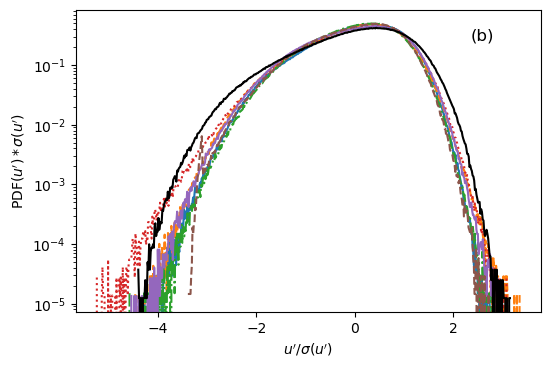

In [10]:
plt.figure(figsize=(6, 4), dpi=100)
plt.yscale("log")
plt.xlabel('$u^\prime/\sigma(u^\prime)$')
plt.ylabel('$\mathrm{PDF}(u^\prime)*\sigma(u^\prime)$')

fmt = ['-', '--', '-.', ':', '-', '--']
label = ['h=0', 'h=1', 'h=2', 'h=4', 'h=8', 'h=16']

gap_dev_std = np.std(gap_dev)

for i in range(len(gap_dev_pred)):
    hist, bin_edges = np.histogram(gap_dev_pred[i], bins='auto', density=True)
    hist *= gap_dev_std
    bin_edges /= gap_dev_std
    plt.plot(bin_edges[0:len(hist)] + 0.5*(bin_edges[1]-bin_edges[0]), hist, fmt[i], label=label[i], linewidth=1.5)

hist, bin_edges = np.histogram(gap_dev, bins='auto', density=True)
hist *= gap_dev_std
bin_edges /= gap_dev_std
plt.plot(bin_edges[0:len(hist)] + 0.5*(bin_edges[1]-bin_edges[0]), hist, '-k', label='Original', linewidth=1.5)

plt.annotate('(b)', (0.85, 0.9), xycoords='axes fraction', fontsize=12)

### *PDFs of velocity gradient*

In [11]:
def ddx_gradient(context, gap, mask_gap):
    shape = context.shape

    inpt = np.zeros([shape[0], shape[1], mask_gap[1][1]-mask_gap[1][0], shape[3]])
    inpt[:,mask_gap[0][0]:mask_gap[0][1],:,:] = gap.copy()

    inpt += context[:, :, mask_gap[1][0]:mask_gap[1][1], :]

    output = np.gradient(inpt, 4*np.pi/128, axis=1)

    return output[:, mask_gap[0][0]:mask_gap[0][1], :, :]

In [12]:
def ddy_gradient(context, gap, mask_gap):
    shape = context.shape

    inpt = np.zeros([shape[0], mask_gap[0][1]-mask_gap[0][0], shape[2], shape[3]])
    inpt[:,:,mask_gap[1][0]:mask_gap[1][1],:] = gap.copy()

    inpt += context[:, mask_gap[0][0]:mask_gap[0][1], :, :]

    output = np.gradient(inpt, 2*np.pi/128, axis=2)

    return output[:, :, mask_gap[1][0]:mask_gap[1][1], :]

In [13]:
# Compute velocity gradient by second order central difference (2nd CD)
dudx_dev = ddx_gradient(context_dev, gap_dev, mask_gap)
dudy_dev = ddy_gradient(context_dev, gap_dev, mask_gap)

dudx_dev_pred, dudy_dev_pred = [], []

for i in range(len(gap_dev_pred)):
    dudx_dev_pred.append( ddx_gradient(context_dev, gap_dev_pred[i], mask_gap) )
    dudy_dev_pred.append( ddy_gradient(context_dev, gap_dev_pred[i], mask_gap) )

Text(0.85, 0.9, '(a)')

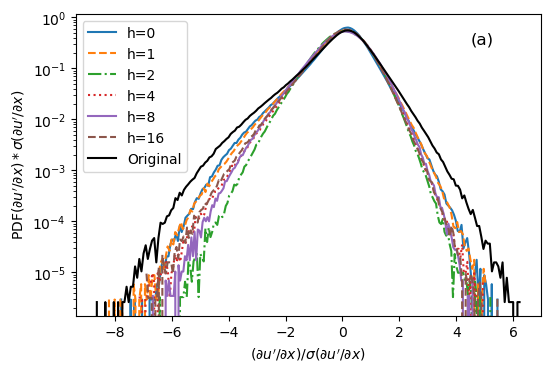

In [14]:
plt.figure(figsize=(6, 4), dpi=100)
plt.yscale("log")
plt.xlabel('$(\partial u^\prime/\partial x)/\sigma(\partial u^\prime/\partial x)$')
plt.ylabel('$\mathrm{PDF}(\partial u^\prime/\partial x)*\sigma(\partial u^\prime/\partial x)$')

fmt = ['-', '--', '-.', ':', '-', '--']
label = ['h=0', 'h=1', 'h=2', 'h=4', 'h=8', 'h=16']

dudx_dev_std = np.std(dudx_dev)

for i in range(len(gap_dev_pred)):
    hist, bin_edges = np.histogram(dudx_dev_pred[i], bins=200, density=True)
    hist *= dudx_dev_std
    bin_edges /= dudx_dev_std
    plt.plot(bin_edges[0:len(hist)] + 0.5*(bin_edges[1]-bin_edges[0]), hist, fmt[i], label=label[i], linewidth=1.5)

hist, bin_edges = np.histogram(dudx_dev, bins=200, density=True)
hist *= dudx_dev_std
bin_edges /= dudx_dev_std
plt.plot(bin_edges[0:len(hist)] + 0.5*(bin_edges[1]-bin_edges[0]), hist, '-k', label='Original', linewidth=1.5)

plt.legend(loc='upper left')
plt.annotate('(a)', (0.85, 0.9), xycoords='axes fraction', fontsize=12)

Text(0.85, 0.9, '(b)')

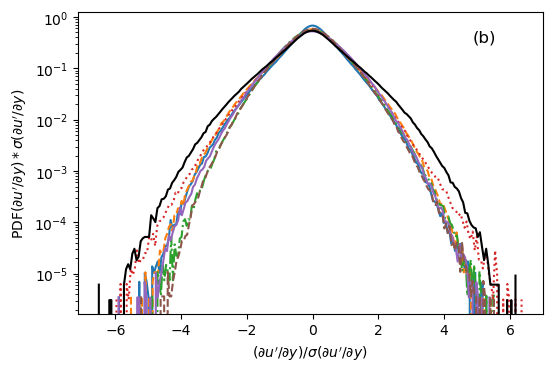

In [15]:
plt.figure(figsize=(6, 4), dpi=100)
plt.yscale("log")
plt.xlabel('$(\partial u^\prime/\partial y)/\sigma(\partial u^\prime/\partial y)$')
plt.ylabel('$\mathrm{PDF}(\partial u^\prime/\partial y)*\sigma(\partial u^\prime/\partial y)$')

fmt = ['-', '--', '-.', ':', '-', '--']

dudy_dev_std = np.std(dudy_dev)

for i in range(len(gap_dev_pred)):
    hist, bin_edges = np.histogram(dudy_dev_pred[i], bins=200, density=True)
    hist *= dudy_dev_std
    bin_edges /= dudy_dev_std
    plt.plot(bin_edges[0:len(hist)] + 0.5*(bin_edges[1]-bin_edges[0]), hist, fmt[i], linewidth=1.5)

hist, bin_edges = np.histogram(dudy_dev, bins=200, density=True)
hist *= dudy_dev_std
bin_edges /= dudy_dev_std
plt.plot(bin_edges[0:len(hist)] + 0.5*(bin_edges[1]-bin_edges[0]), hist, '-k', linewidth=1.5)

plt.annotate('(b)', (0.85, 0.9), xycoords='axes fraction', fontsize=12)

### *Scatter plots of maximum velocity between real and reconstructed data*

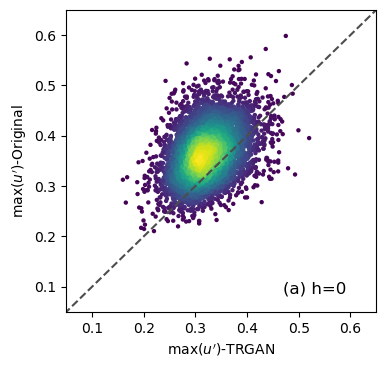

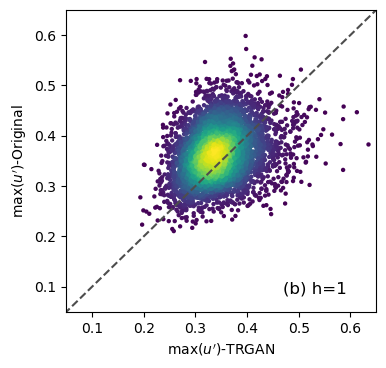

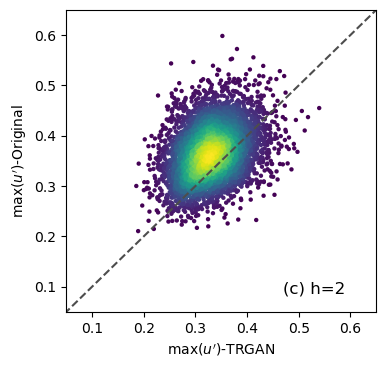

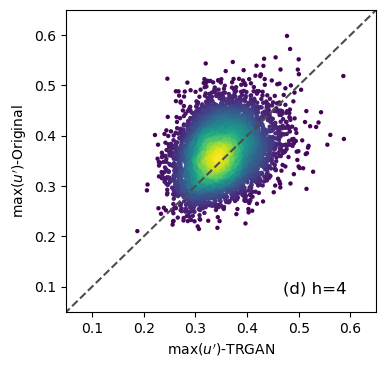

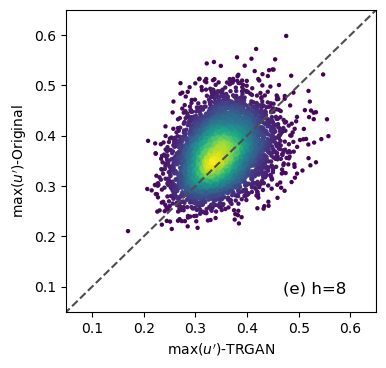

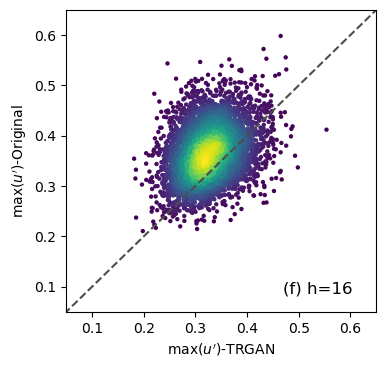

In [16]:
from scipy import stats

label = ['(a) h=0', '(b) h=1', '(c) h=2', '(d) h=4', '(e) h=8', '(f) h=16']

max_gap_dev = np.amax(gap_dev, axis=(1, 2, 3))

for i in range(len(gap_dev_pred)):
    max_gap_dev_pred = np.amax(gap_dev_pred[i], axis=(1, 2, 3))
    
    values = np.vstack([max_gap_dev_pred, max_gap_dev])
    kernel = stats.gaussian_kde(values)

    plt.figure(figsize=[4, 4], dpi=100)
    plt.xlim(0.05, 0.65)
    plt.ylim(0.05, 0.65)

    plt.scatter(max_gap_dev_pred, max_gap_dev, s=10, c=kernel(values), edgecolor='none')
    plt.plot([0, 1], [0, 1], ls="--", c=".3")

    plt.xlabel('$\mathrm{max}(u^\prime)$-TRGAN')
    plt.ylabel('$\mathrm{max}(u^\prime)$-Original')

    plt.annotate(label[i], (0.7, 0.06), xycoords='axes fraction', fontsize=12)

### *Scatter plots of maximum velocity gradients between real and reconstructed data*

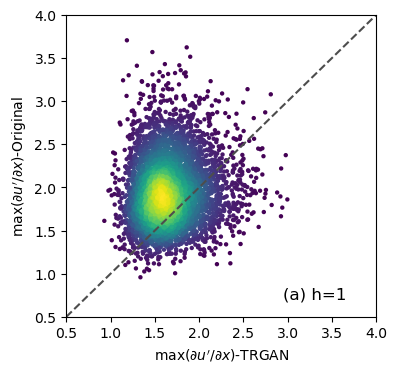

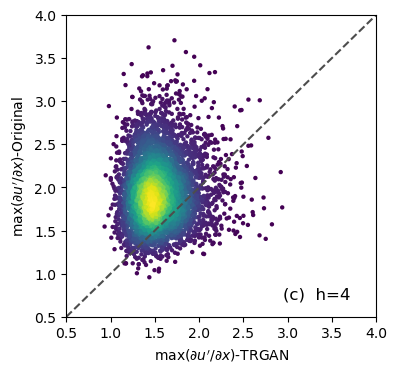

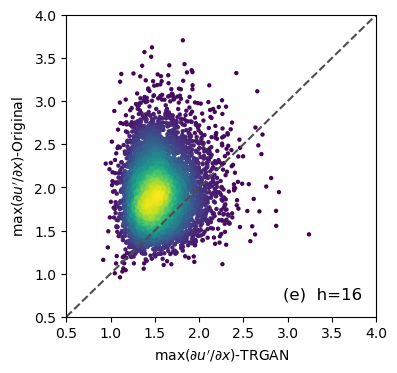

In [17]:
label = ['(a) h=1', '(c)  h=4', '(e)  h=16']

max_dudx_dev = np.amax(dudx_dev, axis=(1, 2, 3))

for i, idx in enumerate( range(1, len(gap_dev_pred), 2) ):
    max_dudx_dev_pred = np.amax(dudx_dev_pred[idx], axis=(1, 2, 3))
    
    values = np.vstack([max_dudx_dev_pred, max_dudx_dev])
    kernel = stats.gaussian_kde(values)

    plt.figure(figsize=[4, 4], dpi=100)
    plt.xlim(0.5, 4)
    plt.ylim(0.5, 4)

    plt.scatter(max_dudx_dev_pred, max_dudx_dev, s=10, c=kernel(values), edgecolor='none')
    plt.plot([0.5, 4], [0.5, 4], ls="--", c=".3")

    plt.xlabel('$\mathrm{max}(\partial u^\prime/\partial x)$-TRGAN')
    plt.ylabel('$\mathrm{max}(\partial u^\prime/\partial x)$-Original')

    plt.annotate(label[i], (0.7, 0.06), xycoords='axes fraction', fontsize=12)

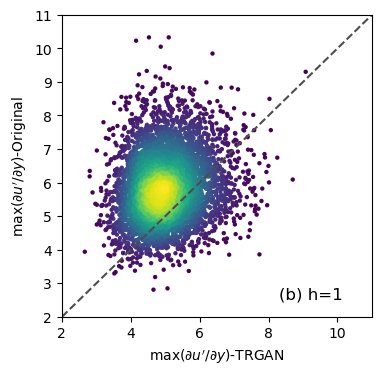

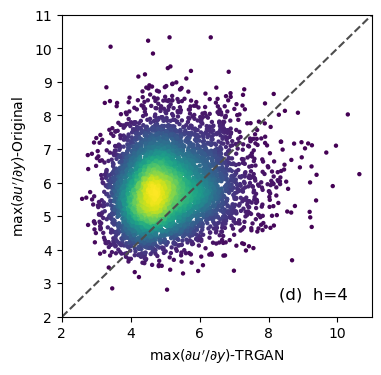

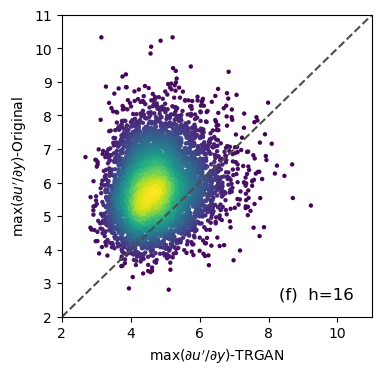

In [18]:
label = ['(b) h=1', '(d)  h=4', '(f)  h=16']

max_dudy_dev = np.amax(dudy_dev, axis=(1, 2, 3))

for i, idx in enumerate( range(1, len(gap_dev_pred), 2) ):
    max_dudy_dev_pred = np.amax(dudy_dev_pred[idx], axis=(1, 2, 3))
    
    values = np.vstack([max_dudy_dev_pred, max_dudy_dev])
    kernel = stats.gaussian_kde(values)

    plt.figure(figsize=[4, 4], dpi=100)
    plt.xlim(2, 11)
    plt.ylim(2, 11)

    plt.scatter(max_dudy_dev_pred, max_dudy_dev, s=10, c=kernel(values), edgecolor='none')
    plt.plot([2, 11], [2, 11], ls="--", c=".3")

    plt.xlabel('$\mathrm{max}(\partial u^\prime/\partial y)$-TRGAN')
    plt.ylabel('$\mathrm{max}(\partial u^\prime/\partial y)$-Original')

    plt.annotate(label[i], (0.7, 0.06), xycoords='axes fraction', fontsize=12)

### *Velocity structure functions*

In [19]:
# Data preparation
mask_gap0 = [[48,80],[48,80]]     # The size and position (relative to the whole image) of the gap

filename = 'G:\\ltyworkstuff\\postdoc\\Results\\dataset\\uf_y41.h5'
with h5py.File(filename, 'r') as hf:
    dataset_dev = np.array(hf.get('dev'))

In [20]:
def inpainting(context, gap, mask):
    img = context.copy()
    img[:,mask[0][0]:mask[0][1],mask[1][0]:mask[1][1],:] = gap

    return img

In [21]:
dataset_dev_pred = []

for i in range(len(gap_dev_pred)):
    dataset_dev_pred.append( inpainting(dataset_dev, gap_dev_pred[i], mask_gap0) )

In [22]:
def structure_function_p_gap(p, inpt, dr, axis, mask):
    inpt_dr = np.roll(inpt, -dr, axis)
    dinpt_p = (inpt_dr - inpt) ** p

    inpt_ndr = np.roll(inpt, dr, axis)
    dinpt_p += (inpt - inpt_ndr) ** p

    return np.mean( dinpt_p[:,mask[0][0]:mask[0][1],mask[1][0]:mask[1][1],:] ) / 2.

***4th order longitudinal structure function***

In [23]:
dr = [1, 2, 4, 8, 16, 32, 64]

L4 = np.empty( (len(gap_dev_pred)//2 + 1, len(dr)) )

for i, idx in enumerate( range(1, len(gap_dev_pred), 2) ):
    for j in range(len(dr)):
        L4[i,j] = structure_function_p_gap(4, dataset_dev_pred[idx], dr[j], 1, mask_gap0)

i = len(gap_dev_pred)//2
for j in range(len(dr)):
    L4[i,j] = structure_function_p_gap(4, dataset_dev, dr[j], 1, mask_gap0)

Text(0.1, 0.9, '(a) $L_4(r)$')

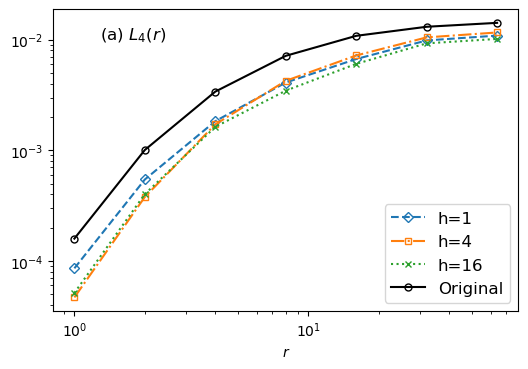

In [24]:
plt.figure(figsize=(6, 4), dpi=100)
plt.xlabel('$r$')

fmt = ['D--', 's-.', 'x:', 'o-k']
label = ['h=1', 'h=4', 'h=16', 'Original']

for i in range(len(L4)):
    plt.loglog(dr, L4[i], fmt[i], ms=5, markerfacecolor='none', label=label[i])

plt.legend(loc='lower right', fontsize='large')
plt.annotate('(a) $L_4(r)$', (0.1, 0.9), xycoords='axes fraction', fontsize=12)

***3th order longitudinal structure function***

In [25]:
dr = [1, 2, 4, 8, 16, 32, 64]

L3 = np.empty( (len(gap_dev_pred)//2 + 1, len(dr)) )

for i, idx in enumerate( range(1, len(gap_dev_pred), 2) ):
    for j in range(len(dr)):
        L3[i,j] = structure_function_p_gap(3, dataset_dev_pred[idx], dr[j], 1, mask_gap0)

i = len(gap_dev_pred)//2
for j in range(len(dr)):
    L3[i,j] = structure_function_p_gap(3, dataset_dev, dr[j], 1, mask_gap0)

Text(0.15, 0.9, '(b) $L_3(r)$')

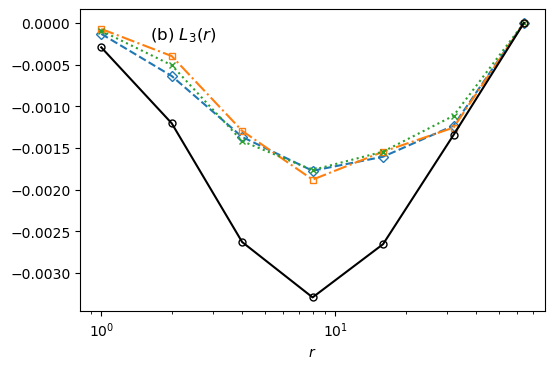

In [26]:
plt.figure(figsize=(6, 4), dpi=100)
plt.xlabel('$r$')

fmt = ['D--', 's-.', 'x:', 'o-k']

for i in range(len(L3)):
    plt.semilogx(dr, L3[i], fmt[i], ms=5, markerfacecolor='none')

plt.annotate('(b) $L_3(r)$', (0.15, 0.9), xycoords='axes fraction', fontsize=12)

***4th order transverse structure function***

In [27]:
dr = [1, 2, 4, 8, 16, 32, 64]

N4 = np.empty( (len(gap_dev_pred)//2 + 1, len(dr)) )

for i, idx in enumerate( range(1, len(gap_dev_pred), 2) ):
    for j in range(len(dr)):
        N4[i,j] = structure_function_p_gap(4, dataset_dev_pred[idx], dr[j], 2, mask_gap0)

i = len(gap_dev_pred)//2
for j in range(len(dr)):
    N4[i,j] = structure_function_p_gap(4, dataset_dev, dr[j], 2, mask_gap0)

Text(0.1, 0.9, '(c) $N_4(r)$')

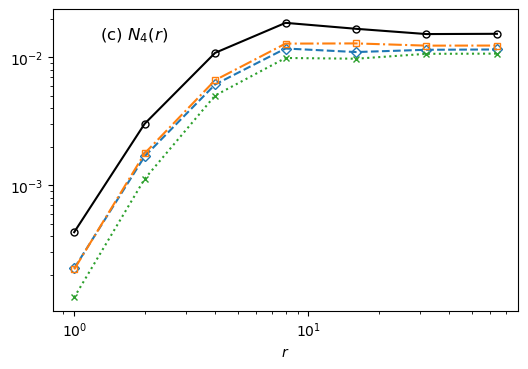

In [28]:
plt.figure(figsize=(6, 4), dpi=100)
plt.xlabel('$r$')

fmt = ['D--', 's-.', 'x:', 'o-k']

for i in range(len(N4)):
    plt.loglog(dr, N4[i], fmt[i], ms=5, markerfacecolor='none')

plt.annotate('(c) $N_4(r)$', (0.1, 0.9), xycoords='axes fraction', fontsize=12)

***3th order transverse structure function***

In [29]:
dr = [1, 2, 4, 8, 16, 32, 64]

N3 = np.empty( (len(gap_dev_pred)//2 + 1, len(dr)) )

for i, idx in enumerate( range(1, len(gap_dev_pred), 2) ):
    for j in range(len(dr)):
        N3[i,j] = structure_function_p_gap(3, dataset_dev_pred[idx], dr[j], 2, mask_gap0)

i = len(gap_dev_pred)//2
for j in range(len(dr)):
    N3[i,j] = structure_function_p_gap(3, dataset_dev, dr[j], 2, mask_gap0)

Text(0.1, 0.9, '(d) $|N_3(r)|$')

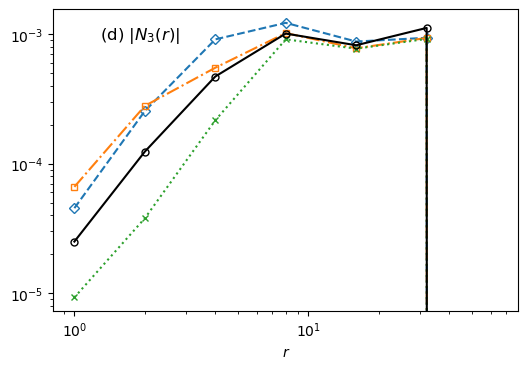

In [30]:
plt.figure(figsize=(6, 4), dpi=100)
plt.xlabel('$r$')

fmt = ['D--', 's-.', 'x:', 'o-k']

for i in range(len(N3)):
    plt.loglog(dr, np.abs(N3[i]), fmt[i], ms=5, markerfacecolor='none')

plt.annotate('(d) $|N_3(r)|$', (0.1, 0.9), xycoords='axes fraction', fontsize=12)

## *Reconstruction samples*

In [31]:
def inpainting(context, gap, mask_gap):
    img = context.copy()
    img[
        :,mask_gap[0][0]:mask_gap[0][1],
        mask_gap[1][0]:mask_gap[1][1],:
    ] = gap

    return img

In [32]:
# Generated images from models
generated = np.empty( (len(gap_dev_pred),) + context_dev.shape, dtype=np.float32 )

for i in range(len(gap_dev_pred)):
    generated[i] = inpainting(context_dev, gap_dev_pred[i], mask_gap)

# Original images
original = inpainting(context_dev, gap_dev, mask_gap)

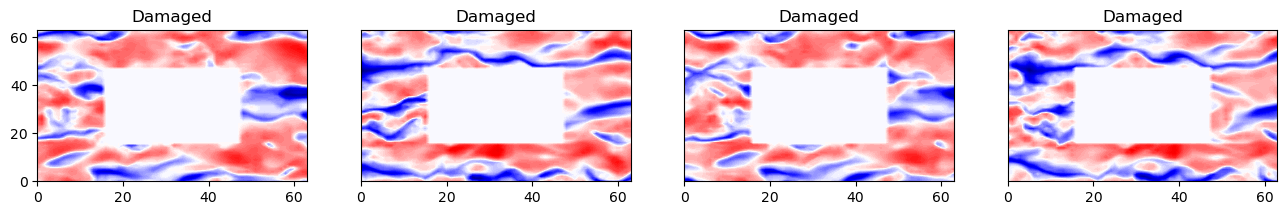

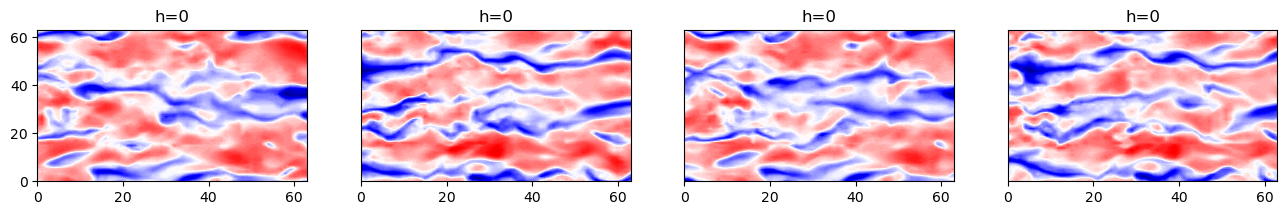

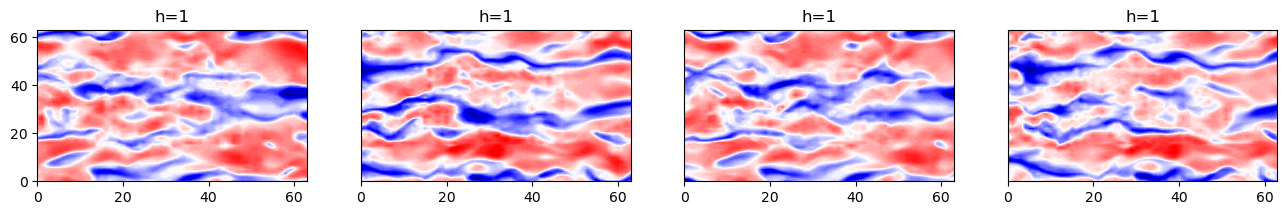

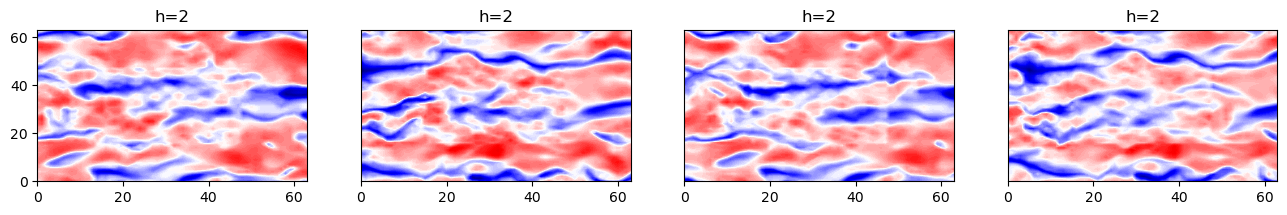

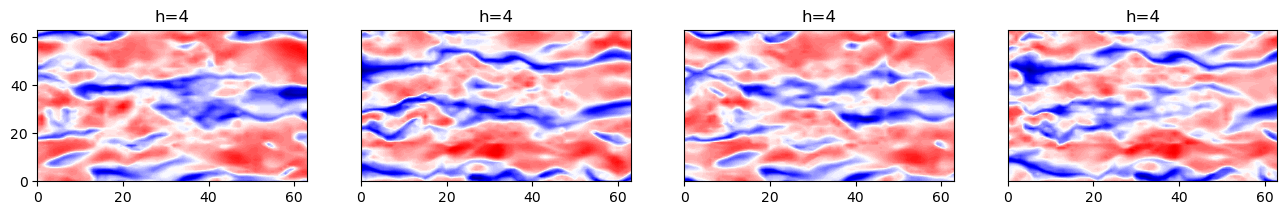

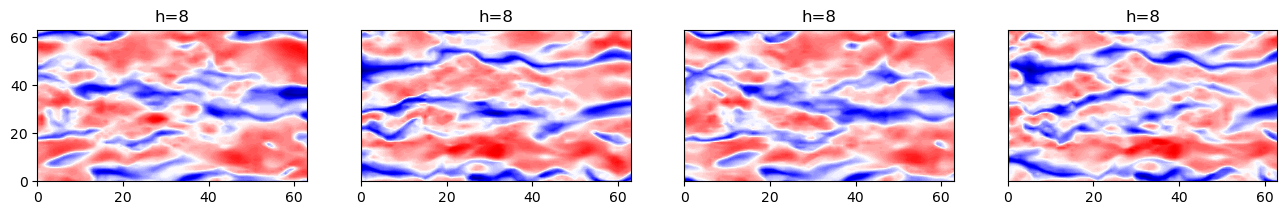

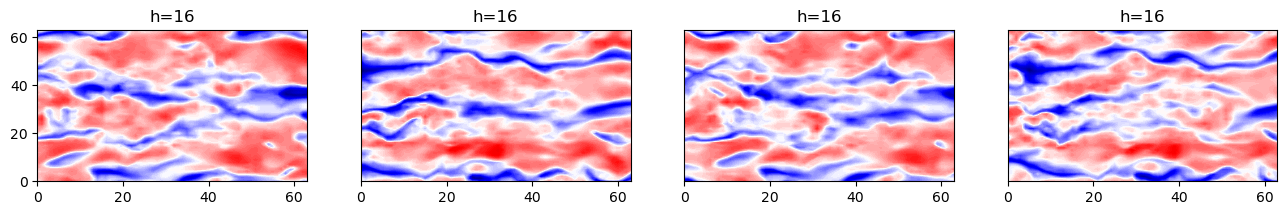

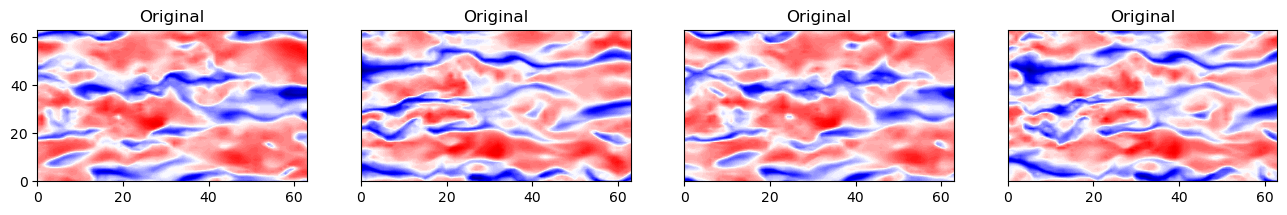

In [33]:
# Plot reconstruction samples for c different configurations
c = 4

imgs = np.empty( (len(gap_dev_pred) + 2, c) + context_dev.shape[1:3], dtype=np.float32 )
imgs[0] = context_dev[-c:,:,:,0]                       # Damaged images
imgs[1:len(gap_dev_pred) + 1] = generated[:,-c:,:,:,0] # Generated images from models
imgs[len(gap_dev_pred) + 1] = original[-c:,:,:,0]      # Original images

title = ['Damaged', 'h=0', 'h=1', 'h=2', 'h=4', 'h=8', 'h=16', 'Original']

for i in range( len(gap_dev_pred) + 2 ):
    figure = plt.figure(figsize=(16, 2), dpi=100)

    for j in range(1):
        plt.subplot(1, 4, j+1, title=title[i])
        plt.contourf(imgs[i,j].swapaxes(0,1), np.linspace(-0.8,0.8,101), cmap=plt.cm.seismic)

    for j in range(1, c):
        plt.subplot(1, 4, j+1, title=title[i])
        plt.yticks([])
        plt.contourf(imgs[i,j].swapaxes(0,1), np.linspace(-0.8,0.8,101), cmap=plt.cm.seismic)